# Problem statement:Heart Disease Prediction

Given clinical parameters about a patient, can we predict whether or not they have heart disease?

### Attribute Information:

# Importing Libraries

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

# Loading Data Set

In [46]:
df = pd.read_csv('C:/Users/Adnin/Downloads/data.csv')

In [47]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145.0,233,1,0,150,0,2.3,0,0,1,1
1,37,male,2,130.0,250,0,1,187,0,3.5,0,0,2,1
2,41,female,1,130.0,204,0,0,172,0,1.4,2,0,2,1
3,56,male,1,120.0,236,0,1,178,0,0.8,2,0,2,1
4,57,female,0,120.0,354,0,1,163,1,0.6,2,0,2,1


In [48]:
df.shape

(303, 14)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    int64  
 3   trestbps  298 non-null    float64
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory usage: 33.3+ KB


In [50]:
df.describe()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,298.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.966997,131.651007,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.320132,0.544554
std,9.082101,1.032052,17.683878,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.592299,0.498835
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [51]:
df.describe(include=['object'])

,sex
count,303
unique,2
top,male
freq,207


In [52]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          3
target        2
dtype: int64

# Checking missing values

In [53]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    5
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

C:\Users\Adnin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


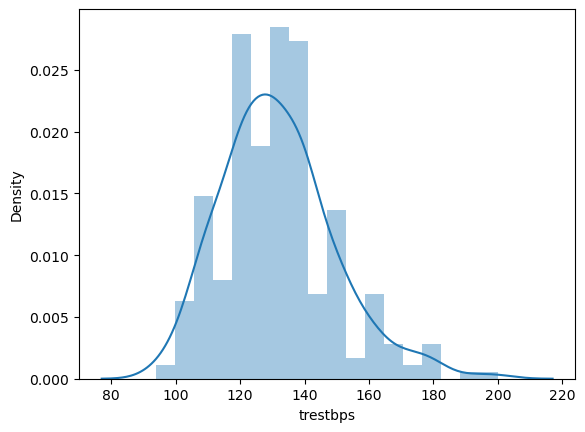

In [54]:
sns.distplot(df['trestbps'])
plt.show()

In [55]:
df['trestbps'] = df['trestbps'].fillna(df['trestbps'].mean())

In [56]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Converting Categorical column into numerical

In [57]:
df.replace({'sex':{'male':1,'female':0}}, inplace=True)

In [58]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130.0,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130.0,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120.0,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120.0,354,0,1,163,1,0.6,2,0,2,1


# Correlation

In [59]:
corr = df.corr()
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.277935,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.067997,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056382,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.212731,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047963,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.166833,0.433798
trestbps,0.277935,-0.056382,0.047963,1.000000,0.123067,0.177769,-0.115083,-0.044949,0.066537,0.191996,-0.120976,0.101199,0.061160,-0.143518
chol,0.213678,-0.197912,-0.076904,0.123067,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.094312,-0.085239
fbs,0.121308,0.045032,0.094444,0.177769,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.022066,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.115083,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.012982,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.044949,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.106598,0.421741
exang,0.096801,0.141664,-0.394280,0.066537,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.217851,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.191996,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.212139,-0.430696


<AxesSubplot:>

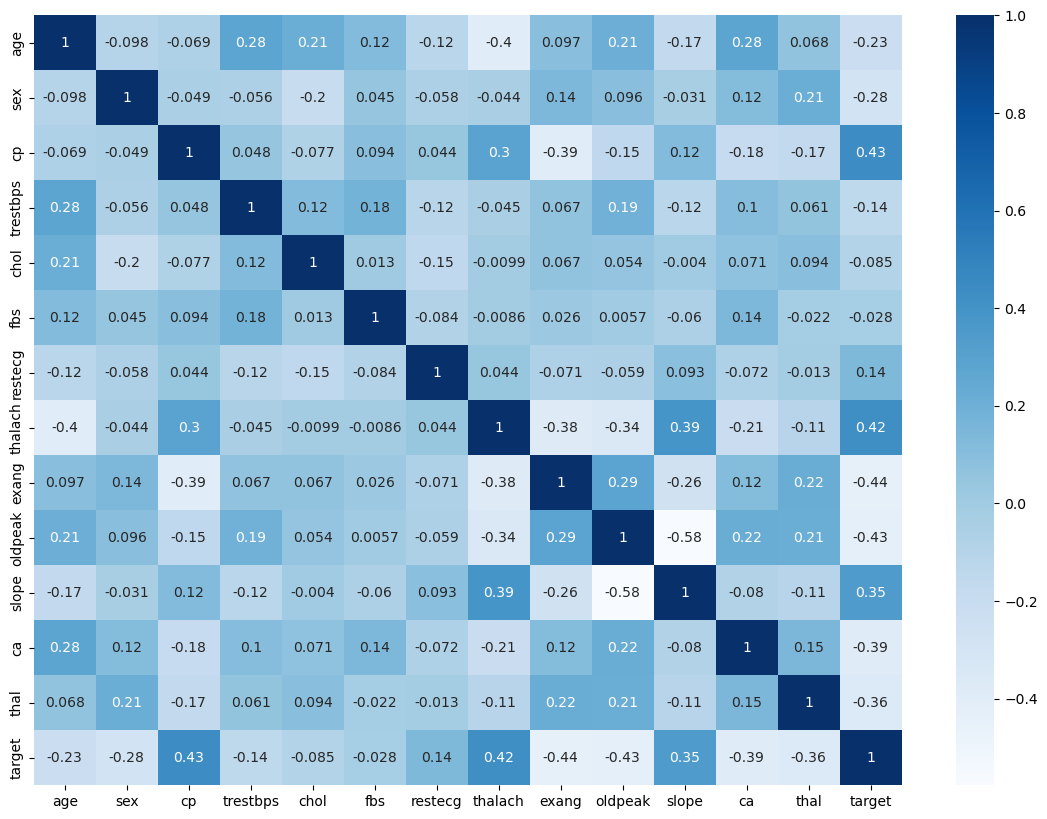

In [60]:
plt.figure(figsize = (14,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

# Data Visualization

# checking how many people have heart disease or not

In [61]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

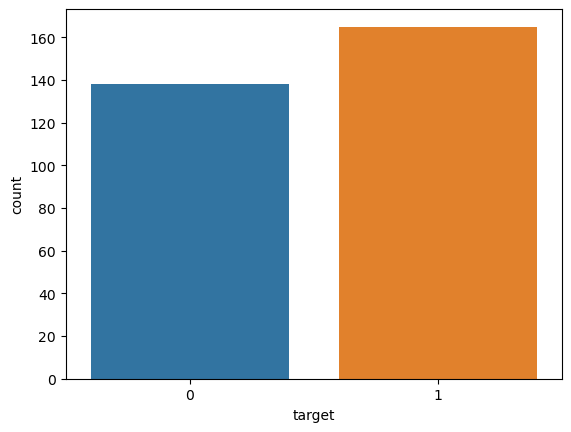

In [62]:
sns.countplot(x='target',data= df)

##### Observation:- 
more than 160 people found to have heart disease.

# checking how many males and females have heart disease

In [63]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

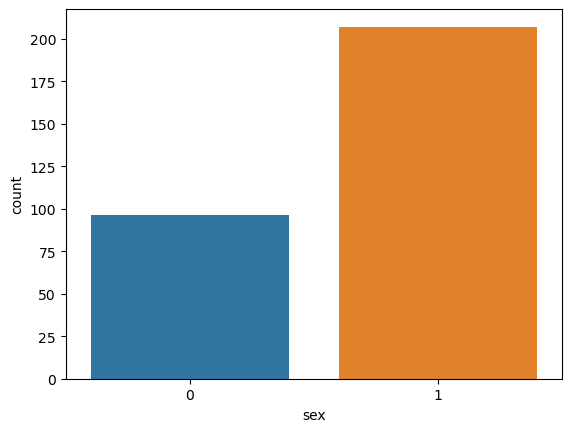

In [64]:
sns.countplot(x='sex',data= df)

##### Observation :- 
males were more effected by heart disease than females

C:\Users\Adnin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

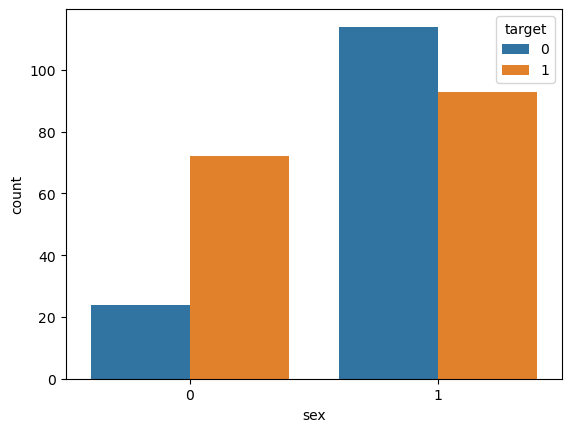

In [65]:
sns.countplot('sex', hue='target', data=df)

<AxesSubplot:xlabel='age', ylabel='count'>

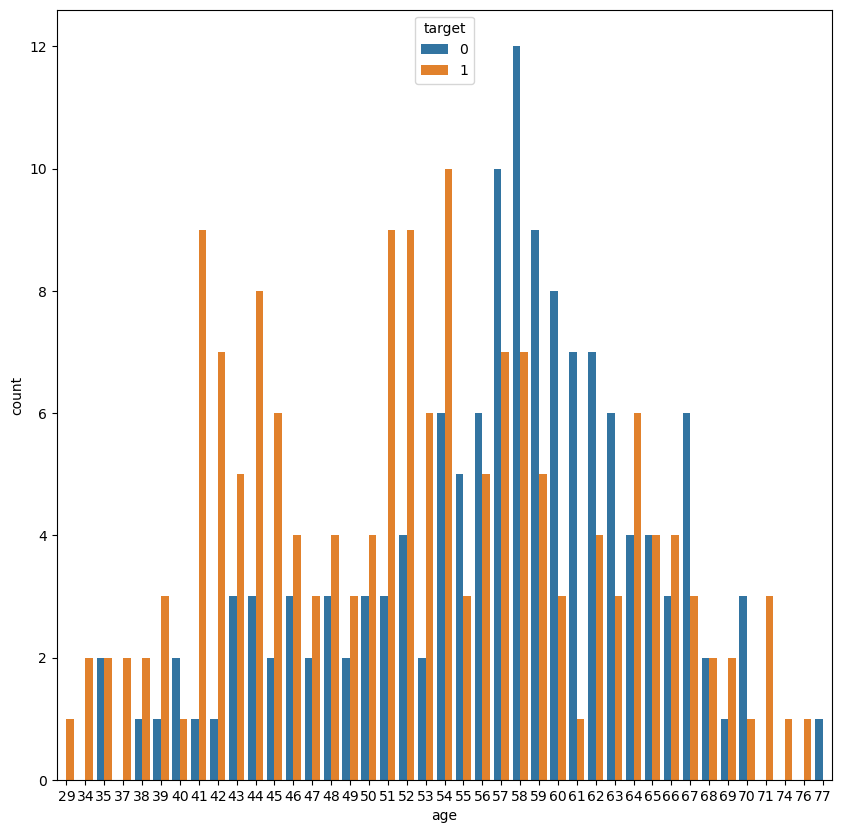

In [66]:
plt.figure(figsize = (10,10))
sns.countplot(x='age',data=df,hue='target')

##### Observation :- 
even young people found to have heart disease and middle age were more affected by it.

C:\Users\Adnin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cp', ylabel='count'>

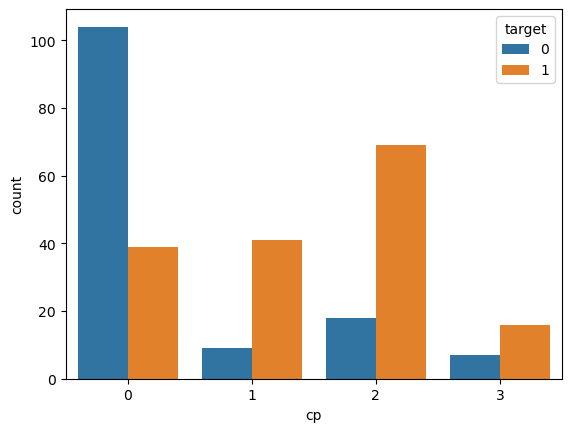

In [67]:
sns.countplot('cp',hue='target',data=df)

##### Observation :- 
the persons having Non-anginal chest pain are more likely to have heart disease

<AxesSubplot:xlabel='target', ylabel='trestbps'>

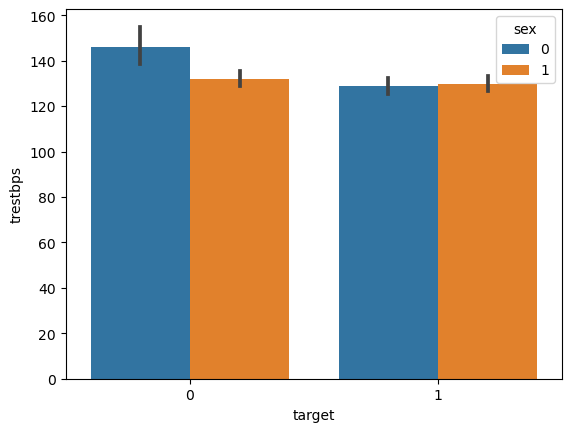

In [68]:
sns.barplot(x="target",y="trestbps",data=df,hue='sex')

##### Observation :- 
gender is not impacting on heart patients whose bp is around 120-140 so bp is seems neutral for both and males

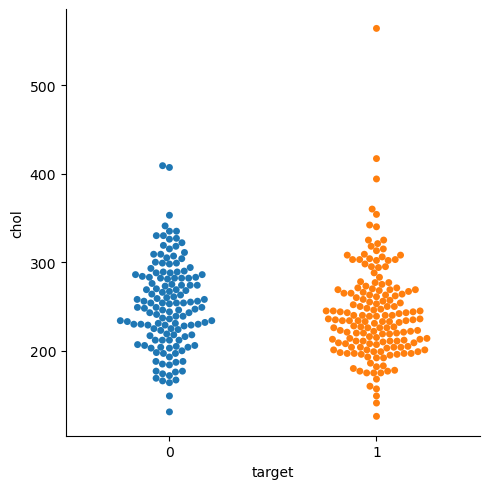

In [69]:
sns.catplot(x="target",y="chol",data=df,kind="swarm")

##### Observation :- 
the persons having cholestrol around 200-300 are more likely to have heart disease

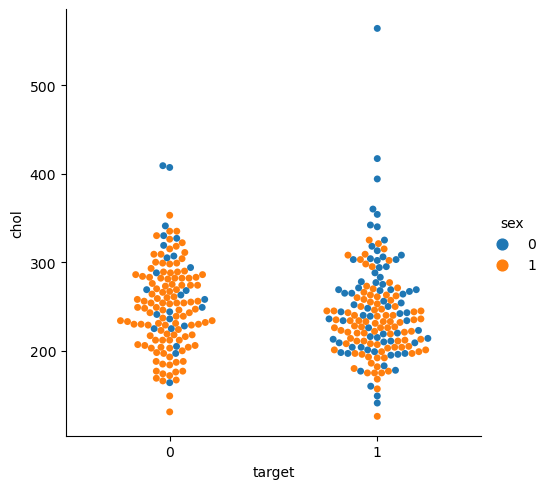

In [70]:
sns.catplot(x="target",y="chol",data=df,hue="sex",kind="swarm")

##### Observation :-
mostly females are more likely to have heart disease whose cholestrol level is around 200-300

<AxesSubplot:xlabel='fbs', ylabel='count'>

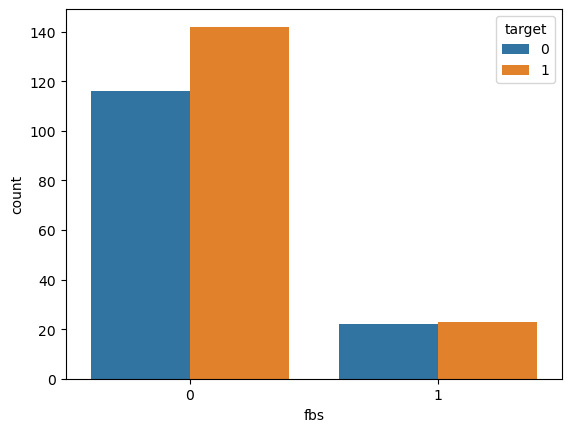

In [71]:
sns.countplot(x="fbs",data=df,hue='target')

##### Observation : 
sugar is not affected 

<AxesSubplot:xlabel='restecg', ylabel='count'>

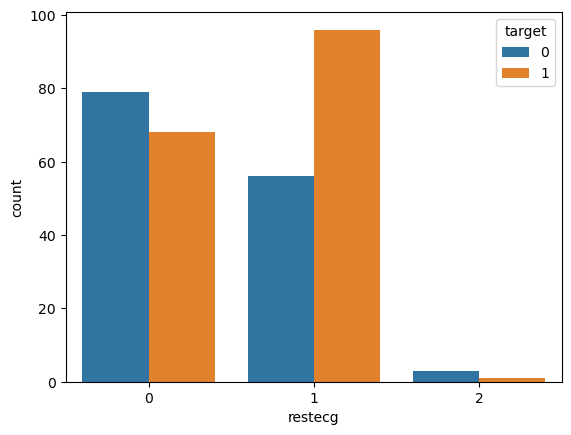

In [72]:
sns.countplot(x="restecg",data=df,hue='target')

##### Observation :- 
persons having ST-T wave abnormality resting ecg are more likely to have heart disease

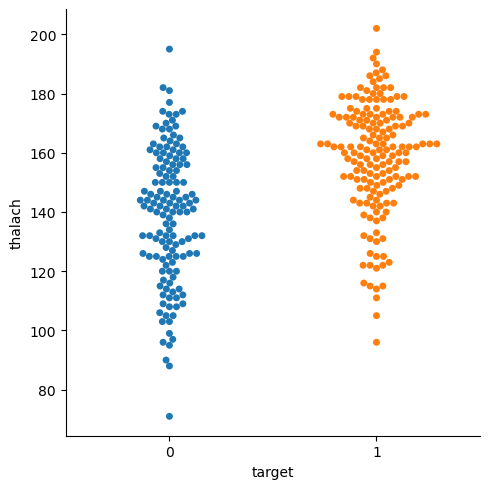

In [73]:
sns.catplot(x="target",y="thalach",data=df,kind="swarm")

##### Observation :- 
the persons having heart rate greater than 140 are more likely to have heart disease

<AxesSubplot:xlabel='exang', ylabel='count'>

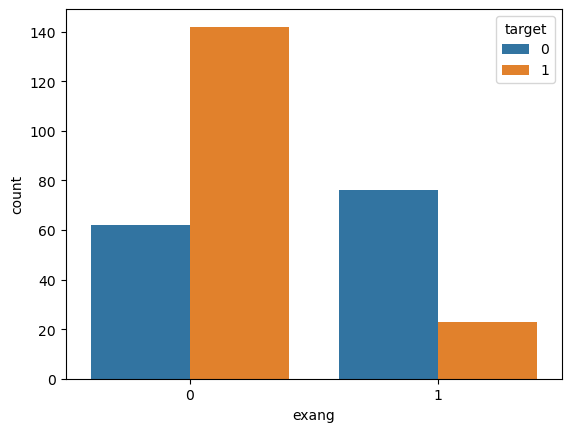

In [74]:
sns.countplot(x="exang",data=df,hue='target')

##### Observation :- 
the persons having exercise induced angina are less likely to have heart disease

<AxesSubplot:xlabel='target', ylabel='oldpeak'>

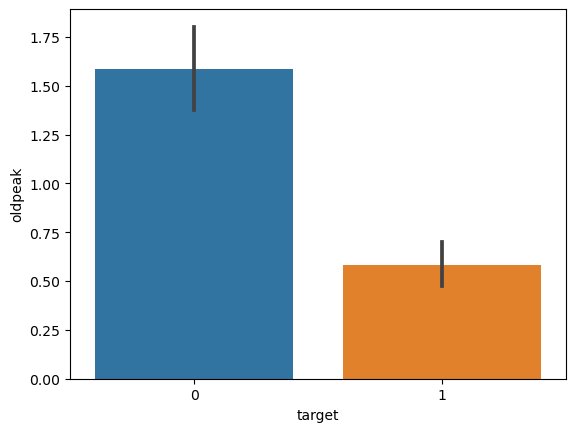

In [75]:
sns.barplot(x="target",y='oldpeak',data=df)

##### Observation :- 
the persons having heart disease are likely to have old peak value is 0.6

<AxesSubplot:xlabel='thal', ylabel='count'>

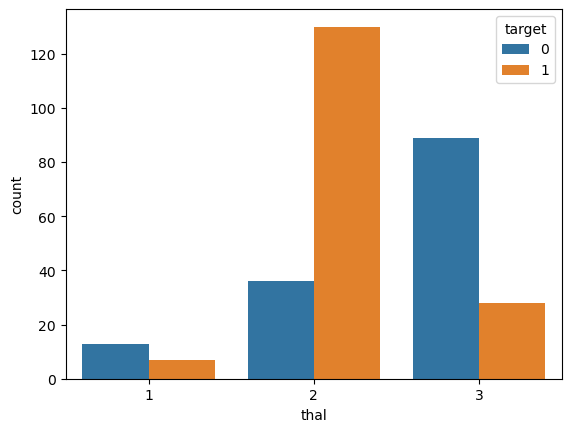

In [76]:
sns.countplot(x="thal",data=df,hue="target")

##### Observation :- 
fixed defect type thal are more effected by heart disease

# Declare feature vector and target variable

In [77]:
x = df.drop('target',axis=1)
y = df['target']

# Split data into separate training and test set

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

In [79]:
x_train.shape,y_train.shape

((242, 13), (242,))

In [80]:
x_test.shape,y_test.shape

((61, 13), (61,))

# Desicion Tree Classifier with gini index 

In [81]:
model_1 = DecisionTreeClassifier(criterion = 'gini',max_depth=4)
model_1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [82]:
y_pred_train = model_1.predict(x_train)

In [83]:
accuracy_score(y_train, y_pred_train)

0.8842975206611571

In [84]:
y_pred = model_1.predict(x_test)

In [85]:
accuracy_score(y_test, y_pred)

0.8524590163934426

#### Here,the training-set accuracy score is 0.8842 while the test-set accuracy to be 0.8688.
These two values are quite comparable. So, there is no sign of overfitting.

In [86]:
confusion_matrix(y_test, y_pred)

array([[26,  3],
       [ 6, 26]], dtype=int64)

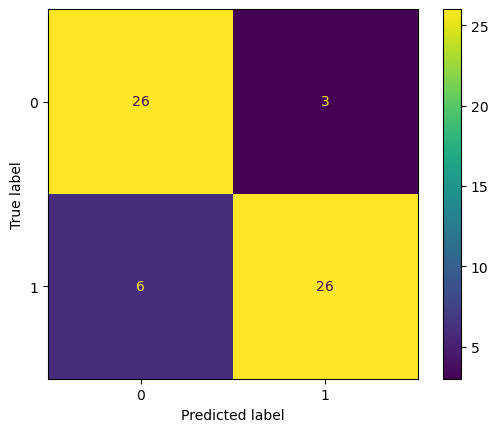

In [87]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.show()

# Visualize decision-trees

[Text(0.5648148148148148, 0.9, 'X[2] <= 0.5\ngini = 0.495\nsamples = 242\nvalue = [109, 133]'),
 Text(0.2962962962962963, 0.7, 'X[11] <= 0.5\ngini = 0.413\nsamples = 110\nvalue = [78, 32]'),
 Text(0.14814814814814814, 0.5, 'X[8] <= 0.5\ngini = 0.498\nsamples = 53\nvalue = [25, 28]'),
 Text(0.07407407407407407, 0.3, 'X[12] <= 2.5\ngini = 0.302\nsamples = 27\nvalue = [5, 22]'),
 Text(0.037037037037037035, 0.1, 'gini = 0.095\nsamples = 20\nvalue = [1, 19]'),
 Text(0.1111111111111111, 0.1, 'gini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.2222222222222222, 0.3, 'X[9] <= 0.7\ngini = 0.355\nsamples = 26\nvalue = [20, 6]'),
 Text(0.18518518518518517, 0.1, 'gini = 0.494\nsamples = 9\nvalue = [4, 5]'),
 Text(0.25925925925925924, 0.1, 'gini = 0.111\nsamples = 17\nvalue = [16, 1]'),
 Text(0.4444444444444444, 0.5, 'X[3] <= 109.0\ngini = 0.131\nsamples = 57\nvalue = [53, 4]'),
 Text(0.37037037037037035, 0.3, 'X[4] <= 233.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.3333333333333333, 0.

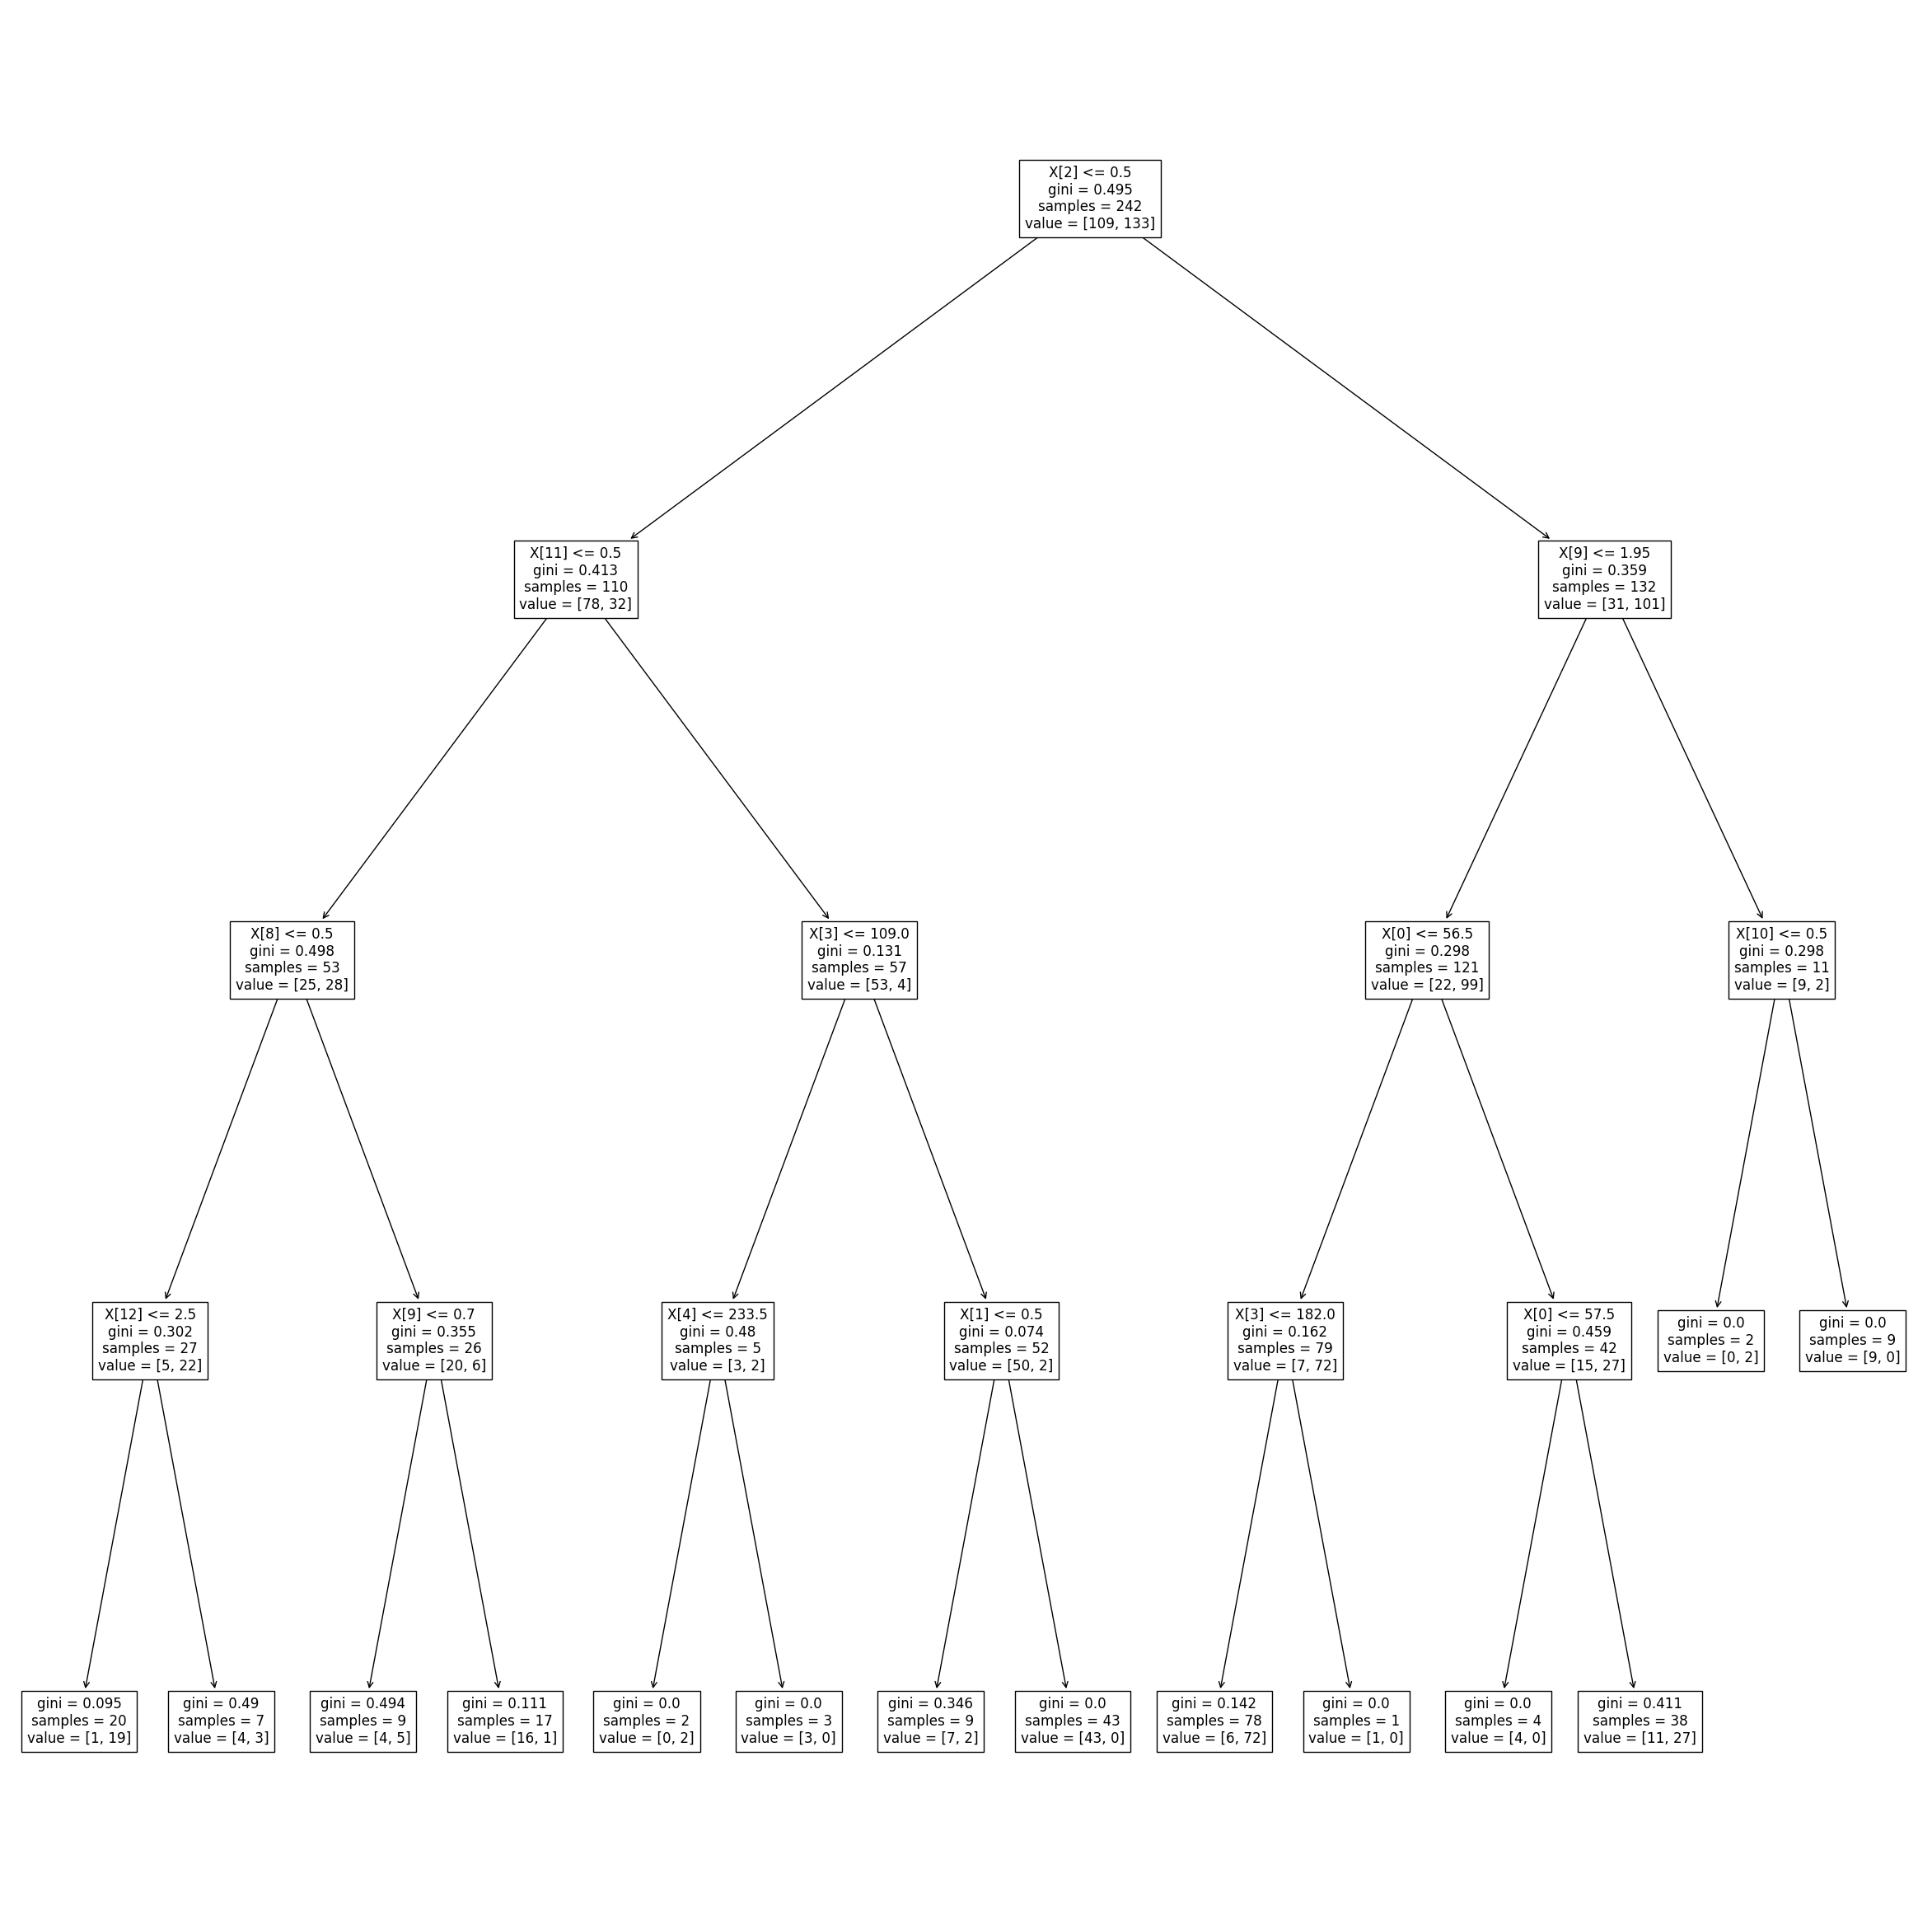

In [88]:
plt.figure(figsize=(30,30))
from sklearn import tree
tree.plot_tree(model_1.fit(x_train,y_train))